In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

# I import my package:

import averagedistorsion as ad

# The case of two candidates

First of all, let(s see what happens in the case of two candidates. We have two candidates $a$ and $b$ and $n$ voters. We want to compute the average distorsion with uniform distribution. In case of tie, we distinguish three models:
- Adversarial: Select the worst outcome
- AntiAdversarial: Select the best outcome
- Consistant: Select the same candidate in all experiments (e.g. $a$)

We create an 2-candidat election object with adversarial tie breaking with the following:

In [2]:
adversarial = ad.adversarialDistortionTwoCand()

We can plot the distribution of distortion:

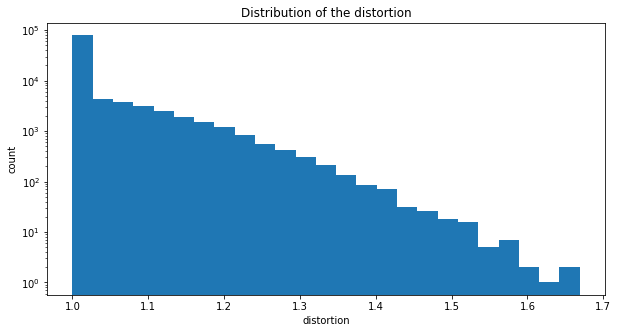

In [3]:
adversarial(100000).showDistribution()

In the cell above, the worst distortion that happened is $1.7$, but the theoretical worst is $3$. If we set the number of voters to $2$ (instead of $20$), we can easily reach this distortion of $3$:

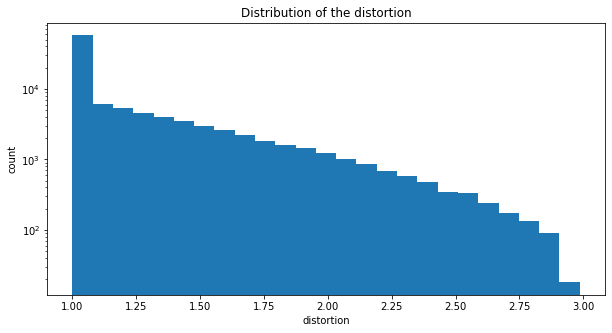

In [4]:
adversarial.n_voters = 2
adversarial(100000).showDistribution()

With $3$ voters, there is no ties, and the worst distortion is below $2$:

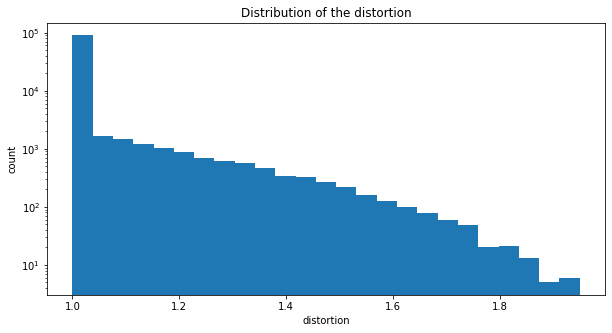

In [5]:
adversarial.n_voters = 3
adversarial(100000).showDistribution()

Let's compare the three tie-breaking mechanisms. Of course, we expect the average distortion of adversarial to be worst than the one of consistent, which is itself worst than the anti-adversarial. However, for odd number of voters, they are identical

In [6]:
adversarial = ad.adversarialDistortionTwoCand(n_voters=2)
consistent = ad.consistentDistortionTwoCand(n_voters=2)
antiAdversarial = ad.antiAdversarialDistortionTwoCand(n_voters=2)

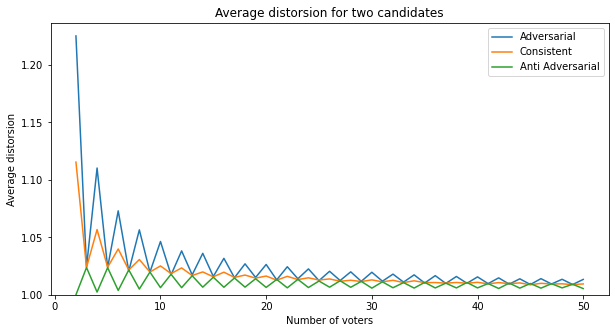

In [7]:
## We compute the average Distortion for the three tie breaking mechanism for 2 to 50 voters
tab_evol = [[] for _ in range(3)]
elections = [adversarial, consistent, antiAdversarial]
labels = ["Adversarial", "Consistent", "Anti Adversarial"]
for n_voters in range(2,51):
    for i in range(3):
        elections[i].n_voters = n_voters
        tab_evol[i].append(np.mean(elections[i](10000).averageDistortion_))
        
## We plot the result
plt.figure(figsize=(10,5))
for i in range(3):
    plt.plot(range(2,51),tab_evol[i], label=labels[i])
plt.legend()
plt.title("Average distorsion for two candidates")
plt.xlabel("Number of voters")
plt.ylabel("Average distorsion")
plt.ylim(1)
plt.show()

# With more candidates...

We will use a uniform Normalized model to generate utilities for voters. This means that utilities are randomly drawn in $[0,1]$ then normalized for each voter.

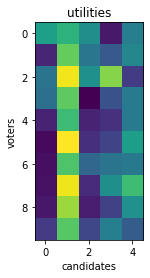

In [7]:
model = ad.gaussian(0.25)
profile = model(n_voters=10, n_candidates=5)
profile
plt.imshow(profile)
plt.xlabel("candidates")
plt.ylabel("voters")
plt.title("utilities")
plt.show()

We can then run an election on this profile using one of the implemented rules

In [8]:
election = ad.borda()
election(profile)
print("Ranking :",election.ranking_)
print("Winner : ",election.winner_)
print("Distortion :",election.distortion_)

Ranking : [1 4 3 2 0]
Winner :  1
Distortion : 1


Let's compare the different voting rules. The rules implemented are the following:

- Positional scoring rules : Plurality, Veto, Harmonic (1, 1/2, 1/3, ...), borda, half approval
- STV
- Plurality with Runoff
- Ranked Pairs
- Random Dictator
- First voter Dictator
- Always Worst candidate (to see the worst possible distortion)

In [10]:
rules = [ad.alwaysWorst(),ad.lottery(), ad.randomDictator(),ad.egalitarian(),ad.veto(), 
         ad.plurality(), ad.pluralityWithRunoff(), ad.stv(), ad.harmonic(), 
         ad.halfApproval(), ad.bucklin(),ad.maximin(), ad.rankedPairs(),ad.copeland(),
         ad.median(), ad.borda(), ad.nashProduct()]

In the following cell, we study the evolution of the distortion with the number of candidates (from $2$ to $10$ in this case)

In [11]:
n_voters = 20 #Number of voters
max_cand = 10 #Maximum number of candidates
n_tries = 10000 #Number of experiments for each rule and n_candidate
phi=0.25
res = []
for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.gaussian(phi=phi))
    tab_evol = []
    for n_candidates in tqdm(range(2,max_cand+1)):
        elector(n_voters=n_voters, n_candidates=n_candidates, n_tries=n_tries)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)
    

100%|██████████| 9/9 [00:06<00:00,  1.40it/s]


We can plot the evolution of the distortion for these rules:

(1.0, 42.14505372104206)

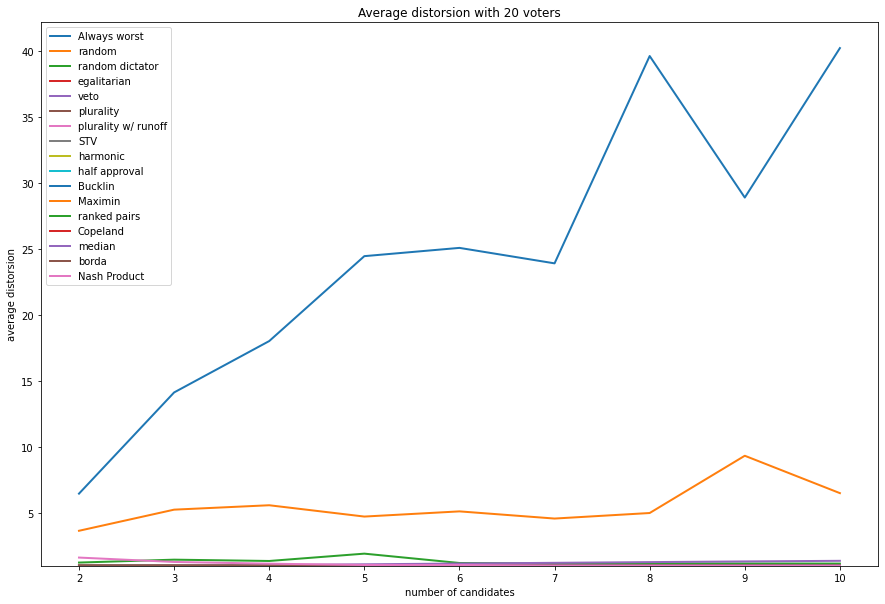

In [12]:
plt.figure(figsize=(15,10))
for j in range(len(rules)):
    plt.plot(range(2,max_cand+1),res[j], label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion with "+str(n_voters)+" voters")
plt.xlabel("number of candidates")
plt.legend()
plt.ylim(1)

As you can see, the "always worst" rule is taking to much space, so we can restrain ourselves to relevant rules:

(1.0, 1.0355524279103285)

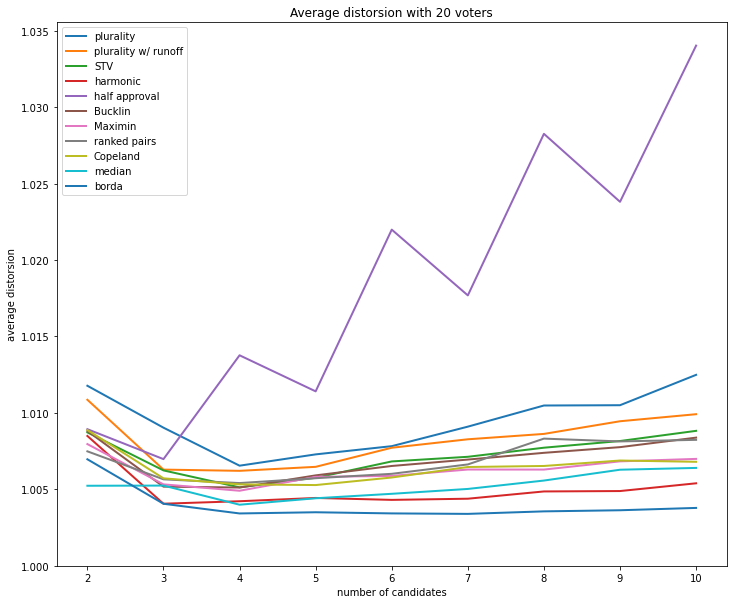

In [22]:
plt.figure(figsize=(12,10))
for j in range(3,len(rules)):
    if (j in [4,3,16]):#[4,9]):
        continue
    plt.plot(range(2,max_cand+1),res[j], label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion with "+str(n_voters)+" voters")
plt.xlabel("number of candidates")
plt.legend()
plt.ylim(1)

We can do the same analysis, but changing the number of voters instead of the number of candidates

In [14]:
n_candidates = 4 #Number of candidates
list_voters = [5, 10, 25, 50, 75, 100] #Possible values for number of voters
n_tries = 10000 #Number of experiments for each rule and n_candidate
res = []
for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.uniformNormalized())
    tab_evol = []
    for n_voters in tqdm(list_voters):
        elector(n_voters=n_voters, n_candidates=n_candidates, n_tries=n_tries)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)

100%|██████████| 6/6 [00:27<00:00,  4.61s/it]


(1.0, 1.1521142077436013)

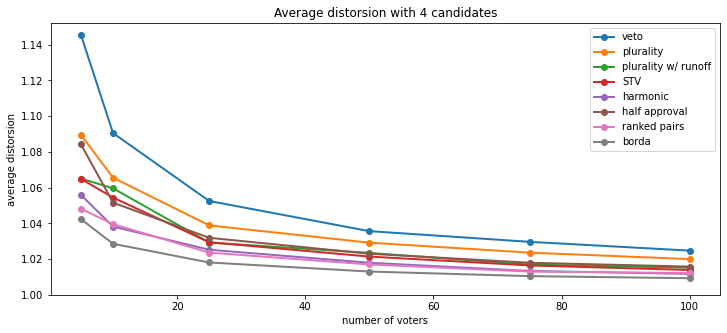

In [16]:
plt.figure(figsize=(12,5))
for j in range(3,len(rules)):
    plt.plot(list_voters, res[j],"o-",label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion with "+str(n_candidates)+" candidates")
plt.xlabel("number of voters")
plt.legend()
plt.ylim(1)

In [26]:
n_voters = 20 #Number of voters
n_candidates = 6 #Number of candidates
max_cand = 10 #Maximum number of candidates
n_tries = 10000 #Number of experiments for each rule and n_candidate
res = []
phitab = [0.05*i for i in range(21)]
for j in range(len(rules)):
    rule = rules[j]
    tab_evol = []
    for phi in tqdm(phitab):
        elector = ad.experimentDistortion(rule=rule, model=ad.gaussian(phi=phi))
        elector(n_voters=n_voters, n_candidates=n_candidates, n_tries=n_tries)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)
    

100%|██████████| 21/21 [00:14<00:00,  1.43it/s]


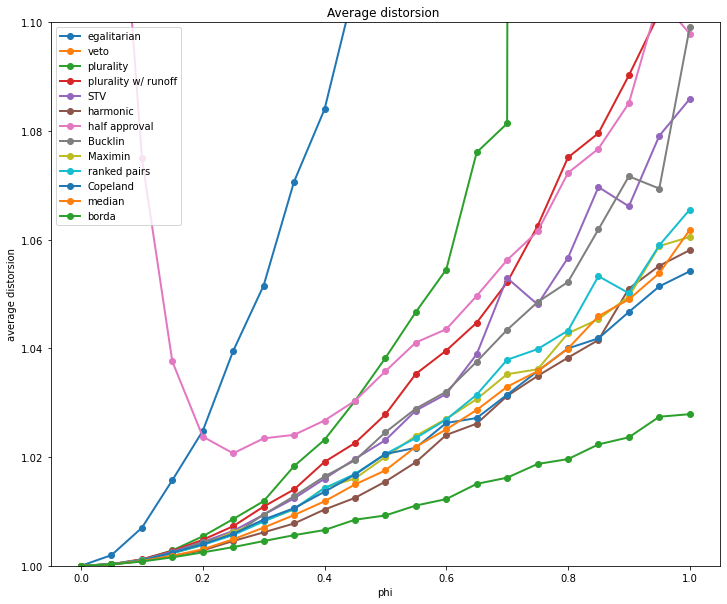

In [34]:
plt.figure(figsize=(12,10))
for j in range(3,len(rules)):
    if j in [16]:
        continue
    plt.plot(phitab, res[j],"o-",label=rules[j].name,linewidth=2)
plt.ylabel("average distorsion")
plt.title("Average distorsion ")
plt.xlabel("phi")
plt.legend()
plt.ylim(1,1.1)
plt.show()

# What about irrelevant alternatives ?

We are now interested in the case in which we have a certain amount of candidates, and the chair can add virtual candidates to get more informations from the voters. None of the virtual candidates can win the election, but they might bring new information useful to chose a winner.

In [16]:
rules = [ ad.plurality(), 
          ad.veto(), 
          ad.stv(), 
          ad.halfApproval(),
          ad.maximin(),
          ad.bucklin(),
          ad.harmonic(),
          ad.rankedPairs(),
          ad.copeland(),
          ad.borda()]
          #ad.alterBorda() NOT IMPLEMENTED

We can do the experiment and see how the average distortion change with the number of irrelevant alternatives:

In [17]:
res =[]
n_candidates = 2 # REAL candidates
max_cand = 10 # VIRTUAL candidates
n_voters = 20 # Voters
n_tries = 10000 # Number of experiments
for j in range(len(rules)):
    rule = rules[j]
    elector = ad.experimentDistortion(rule=rule, model=ad.uniformNormalized())
    tab_evol = []
    for irrelevant_cand in tqdm(range(max_cand)):
        elector(n_voters=n_voters, n_candidates=n_candidates+irrelevant_cand,
                n_tries=n_tries, irrelevant_candidates=irrelevant_cand)
        tab_evol.append(elector.averageDistortion_)
    res.append(tab_evol)

100%|██████████| 10/10 [00:36<00:00,  3.67s/it]


We can plot the results. We distinguish three family of rules:

- Irrelevant alternatives raise the distortion (plurality, veto, stv)
- Irrelevant alternatives does not change the distortion (harmonic)
- Irrelevant alternatives reduce the distortion (borda)

Half Approval seems to be in between the last two categories. Maybe a finer approval rule could  be interesting ?


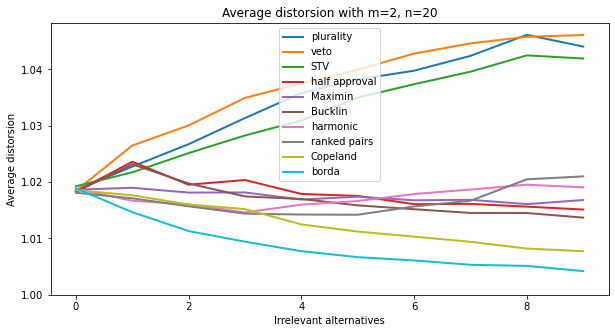

In [19]:
plt.figure(figsize=(10,5))
for j in range(len(rules)):
    plt.plot(range(10), res[j], label=rules[j].name, linewidth=2)
plt.legend()
plt.title("Average distorsion with m="+str(n_candidates)+", n="+str(n_voters))
plt.xlabel("Irrelevant alternatives")
plt.ylabel("Average distorsion")
plt.ylim(1)
plt.show()

Maybe Borda is a good rule because we use the uniform distribution. What happen with other distribution model for voters utilites ? 